In [1]:
# libraries dependencies
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt


I=71  #Inputs 
J=3   #outputs
N=2   #features 
K=4   #Number of hidden Neurons
a=0.0001 #learning rate


In [2]:
dataset=np.loadtxt("data_ffnn_3classes.txt")
dataset=np.array(dataset)
X = dataset[:, [0, 1]]
Y=dataset[:,2]
#print(X.shape)
print(dataset)


[[1.9643 4.5957 1.    ]
 [2.2753 3.8589 1.    ]
 [2.9781 4.5651 1.    ]
 [2.932  3.5519 1.    ]
 [3.5772 2.856  1.    ]
 [4.015  3.1937 1.    ]
 [3.3814 3.4291 1.    ]
 [3.9113 4.1761 1.    ]
 [2.7822 4.0431 1.    ]
 [2.5518 4.6162 1.    ]
 [3.3698 3.9101 1.    ]
 [3.1048 3.0709 1.    ]
 [1.9182 4.0534 1.    ]
 [2.2638 4.3706 1.    ]
 [2.6555 3.5008 1.    ]
 [3.1855 4.2888 1.    ]
 [3.6579 3.8692 1.    ]
 [3.9113 3.4291 1.    ]
 [3.6002 3.1221 1.    ]
 [3.0357 3.3165 1.    ]
 [1.5841 3.3575 0.    ]
 [2.0103 3.2039 0.    ]
 [1.9527 2.7843 0.    ]
 [2.2753 2.7127 0.    ]
 [2.3099 2.9584 0.    ]
 [2.8283 2.6309 0.    ]
 [3.0473 2.2931 0.    ]
 [2.4827 2.0373 0.    ]
 [2.5057 2.3853 0.    ]
 [1.8721 2.0577 0.    ]
 [2.0103 2.3546 0.    ]
 [1.2269 2.3239 0.    ]
 [1.8951 2.9174 0.    ]
 [1.561  3.0709 0.    ]
 [1.5495 2.6923 0.    ]
 [1.6878 2.4057 0.    ]
 [1.4919 2.0271 0.    ]
 [0.962  2.682  0.    ]
 [1.1693 2.9276 0.    ]
 [0.8122 2.9992 0.    ]
 [0.9735 3.3881 0.    ]
 [1.25   3.1937 

In [3]:
bias  = np.ones((71,1))
Xbar = np.concatenate((bias, X), axis=1)
# Xbar.shape
print(Xbar[0:5])

[[1.     1.9643 4.5957]
 [1.     2.2753 3.8589]
 [1.     2.9781 4.5651]
 [1.     2.932  3.5519]
 [1.     3.5772 2.856 ]]


In [4]:
V=np.random.rand(2+1,4)  #aleatoire a revoir entre -1 et 1  # dimension(N+1,K)
# V.shape
print(V)

[[0.11291462 0.84541889 0.81573355 0.97678427]
 [0.15307934 0.39975823 0.26450867 0.90583909]
 [0.86582098 0.06020407 0.62509695 0.20305477]]


In [5]:
# Xbarbar.shape
Xbarbar = np.dot(Xbar, V)
print(Xbarbar[0:5])


[[4.39266184 1.90734382 4.20806598 3.68930282]
 [3.80233262 1.98731027 3.82975675 3.82140802]
 [4.52135955 2.31077647 4.45709691 4.60142901]
 [3.63705278 2.23134885 3.81155483 4.35393474]
 [3.13329475 2.44737685 3.54721086 4.79707631]]


In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [7]:
F= sigmoid(Xbarbar)
print(F)

[[0.98778333 0.87072045 0.98534292 0.97561983]
 [0.9781686  0.87945829 0.97874662 0.97857225]
 [0.98924275 0.90976562 0.98853695 0.99006227]
 [0.97434565 0.90302954 0.97836467 0.98730705]
 [0.95824542 0.92036941 0.97200162 0.99181372]
 [0.97047936 0.93356099 0.97964987 0.99484297]
 [0.97339068 0.91710195 0.97923826 0.99130336]
 [0.9869703  0.9346498  0.98857854 0.99535713]
 [0.98269686 0.90034262 0.98335694 0.9868485 ]
 [0.98901681 0.8950538  0.98758405 0.98559466]
 [0.98226303 0.91893232 0.98449958 0.99202349]
 [0.96256678 0.90648638 0.97225575 0.98802391]
 [0.98046981 0.86486116 0.9793036  0.97173413]
 [0.98584753 0.88220924 0.98442786 0.98044727]
 [0.97209053 0.89261542 0.97602498 0.98358638]
 [0.9867952  0.91506058 0.9871216  0.99127843]
 [0.9824138  0.92694192 0.98525367 0.99379338]
 [0.97541294 0.93184862 0.98190442 0.99460078]
 [0.96666392 0.92219791 0.97633094 0.99239974]
 [0.96920467 0.9053925  0.97568002 0.98787242]
 [0.9631162  0.8430119  0.9655605  0.95662301]
 [0.9606326  

In [8]:
bias2 = np.ones((71, 1))
Fbar = np.concatenate((bias2, F), axis=1)
Fbar.shape #=> 71,5
print(Fbar)


[[1.         0.98778333 0.87072045 0.98534292 0.97561983]
 [1.         0.9781686  0.87945829 0.97874662 0.97857225]
 [1.         0.98924275 0.90976562 0.98853695 0.99006227]
 [1.         0.97434565 0.90302954 0.97836467 0.98730705]
 [1.         0.95824542 0.92036941 0.97200162 0.99181372]
 [1.         0.97047936 0.93356099 0.97964987 0.99484297]
 [1.         0.97339068 0.91710195 0.97923826 0.99130336]
 [1.         0.9869703  0.9346498  0.98857854 0.99535713]
 [1.         0.98269686 0.90034262 0.98335694 0.9868485 ]
 [1.         0.98901681 0.8950538  0.98758405 0.98559466]
 [1.         0.98226303 0.91893232 0.98449958 0.99202349]
 [1.         0.96256678 0.90648638 0.97225575 0.98802391]
 [1.         0.98046981 0.86486116 0.9793036  0.97173413]
 [1.         0.98584753 0.88220924 0.98442786 0.98044727]
 [1.         0.97209053 0.89261542 0.97602498 0.98358638]
 [1.         0.9867952  0.91506058 0.9871216  0.99127843]
 [1.         0.9824138  0.92694192 0.98525367 0.99379338]
 [1.         0

In [9]:
W = np.random.rand(4+1, 3)  # 3 neuron output 5,3
W


array([[0.37082778, 0.30721062, 0.54801964],
       [0.38526134, 0.29927707, 0.33386845],
       [0.49789529, 0.57350601, 0.32559982],
       [0.13883318, 0.30240075, 0.16448163],
       [0.17557494, 0.08316357, 0.86722693]])

In [10]:
Fbarbar=np.dot(Fbar,W)  #(71,5)*(5,3)
Fbarbar.shape
print(Fbarbar)


[[1.49300279 1.4812994  2.16947035]
 [1.49325173 1.48168395 2.17058079]
 [1.51598463 1.50629578 2.19572094]
 [1.50499549 1.494669   2.18449145]
 [1.50733399 1.49824569 2.18762365]
 [1.52020897 1.51203724 2.1998884 ]
 [1.5124571  1.50305033 2.19236398]
 [1.52843428 1.52033983 2.20766322]
 [1.50748767 1.49709889 2.18682826]
 [1.50765594 1.49713114 2.18682417]
 [1.51764349 1.50840626 2.19741206]
 [1.50145644 1.49133865 2.18130128]
 [1.48574718 1.47360086 2.16075767]
 [1.49869776 1.48743371 2.17660078]
 [1.49796346 1.48700459 2.1767362 ]
 [1.51769505 1.50827311 2.1974497 ]
 [1.52210496 1.51342017 2.20172925]
 [1.5215276  1.51319333 2.20113882]
 [1.51219166 1.50317173 2.19224999]
 [1.50391792 1.49372077 2.18359314]
 [1.46362173 1.45046402 2.13248448]
 [1.47498719 1.46249744 2.14920378]
 [1.46343712 1.45065897 2.13622035]
 [1.47212692 1.46001663 2.14822046]
 [1.47900381 1.46703867 2.15558031]
 [1.48578989 1.47496844 2.16512669]
 [1.48244535 1.47222437 2.16273701]
 [1.45757496 1.44605661 2.13

In [15]:
G = sigmoid(Fbarbar) #=Y
G.shape
# print(G)



(71, 3)

In [73]:
yredefined =np.array(
    [[1 if val == 0 else 0, 1 if val == 1 else 0, 1 if val == 2 else 0] for val in Y])   #construire grace a Y yredefined qui correspond à une matrice avec 1 qui est la categorie de classification definie
    
yredefined



array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [74]:
def forward(V, W):
    Xbarbar = np.dot(Xbar, V)
    F = sigmoid(Xbarbar)
    bias2 = np.ones((71, 1))
    Fbar = np.concatenate((bias2, F), axis=1)
    Fbarbar = np.dot(Fbar, W)
    G = sigmoid(Fbarbar)
    return F, G, Fbar

F,G,Fbar= forward(V,W)
print(G)


[[0.90660363 0.9211058  0.94104236]
 [0.9051223  0.91967183 0.93938642]
 [0.90797273 0.922514   0.94312549]
 [0.90539252 0.91999279 0.94005514]
 [0.90448347 0.91914317 0.93921577]
 [0.90607895 0.92072757 0.94123638]
 [0.90577051 0.92039314 0.94068388]
 [0.90823684 0.92281045 0.94366985]
 [0.9064649  0.92103408 0.94128135]
 [0.90753116 0.92205982 0.94245415]
 [0.90697107 0.92156299 0.94208993]
 [0.90429824 0.91892772 0.93880086]
 [0.90501973 0.91953427 0.9390268 ]
 [0.90650429 0.92103383 0.94108597]
 [0.9047675  0.91935495 0.93915885]
 [0.90761523 0.92217853 0.94277879]
 [0.9072518  0.92184949 0.94249614]
 [0.90652828 0.92115949 0.94172992]
 [0.9052765  0.91992263 0.94017183]
 [0.90490061 0.9195164  0.93950411]
 [0.90190634 0.91637063 0.93468303]
 [0.90243918 0.9169671  0.93577803]
 [0.90067439 0.91518079 0.9334131 ]
 [0.90127664 0.91583272 0.93448498]
 [0.90228011 0.91684446 0.93580733]
 [0.90231209 0.91693264 0.93619192]
 [0.90159803 0.91624158 0.93541948]
 [0.8990726  0.91363678 0.93

In [61]:
G[0:5]
G.shape


(71, 3)

In [14]:
def error(G,yredefined):
    E=0
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            ypred=G[i][j]
            # ypred=G[i].argmax()
            E=E+(np.square(ypred-yredefined[i][j]))/2
    return E

In [15]:
def backward(G,Fbar,F):
    dW = 0
    dV = 0

    for k in range(K+1):
        for j in range(J):
            for i in range(I):
                dW += (G[i][j]-yredefined[i][j])*G[i][j]*(1-G[i][j])*Fbar[i][k]
            W[k][j] = W[k][j]-a*dW

    for k in range(K-1):
        for j in range(J):
            for i in range(I):
                dV += (G[i][j]-yredefined[i][j])*G[i][j] *(1-G[i][j])*F[i][k]*(1-F[i][k])*W[k][j]
        V[k][j] = V[k][j]-a*dV
    return V,W

  

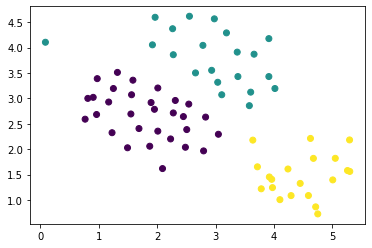

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')

In [17]:
# def sigmoid_derivative(z):
#     return np.exp(-z)/((1+np.exp(-z))**2)


In [18]:
# dW=0
# for k in range(K+1):
#     for j in range(J):
#         for i in range(I):
#             dW += (G[i][j]-yredefined[i][j])*G[i][j]*(1-G[i][j])*Fbar[i][k]
#         W[k][j] = W[k][j]-a*dW
    

    

In [19]:
# dV=0
# for k in range(K-1):
#     for j in range(J):
#         for i in range(I):
#             dV += (G[i][j]-yredefined[i][j])*G[i][j]*(1-G[i][j])*F[i][k]*(1-F[i][k])*W[j][k]
#     V[k][j] = V[k][j]-a*dV




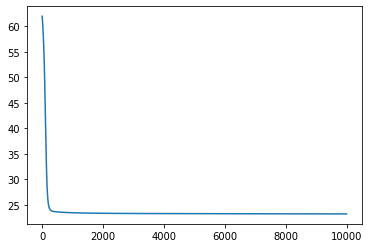

In [20]:
errors=[]
for itera in range(10000):  
   # print(E)
   F,G,Fbar= forward(V,W)
   E= error(G,yredefined)
   V,W=backward(G,Fbar,F)
   errors.append(E)
        
   # print(E) 
 
plt.plot(errors)



   



   

    
    
    